#

In [1]:
import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    geom_point,
    facet_grid,
    labs,
    guide_legend,
    guides,
    theme,
    element_text,
    element_line,
    element_rect,
    theme_set,
    theme_void
)
from plotnine.data import mtcars

# We use theme_void as the base theme so that the modifications
# we make in the code are transparent in the output
theme_set(theme_void())

In [2]:
mtcars.head()

The base plots we will use for the demonstation and some colors.

In [3]:
p1 = (ggplot(mtcars, aes('wt', 'mpg', color='factor(cyl)'))
      + geom_point()
      + labs(title='mpg vs wt')
     )

p2 = p1 + facet_grid('gear ~ am')

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'

What the plots look like unmodified (unthemed).

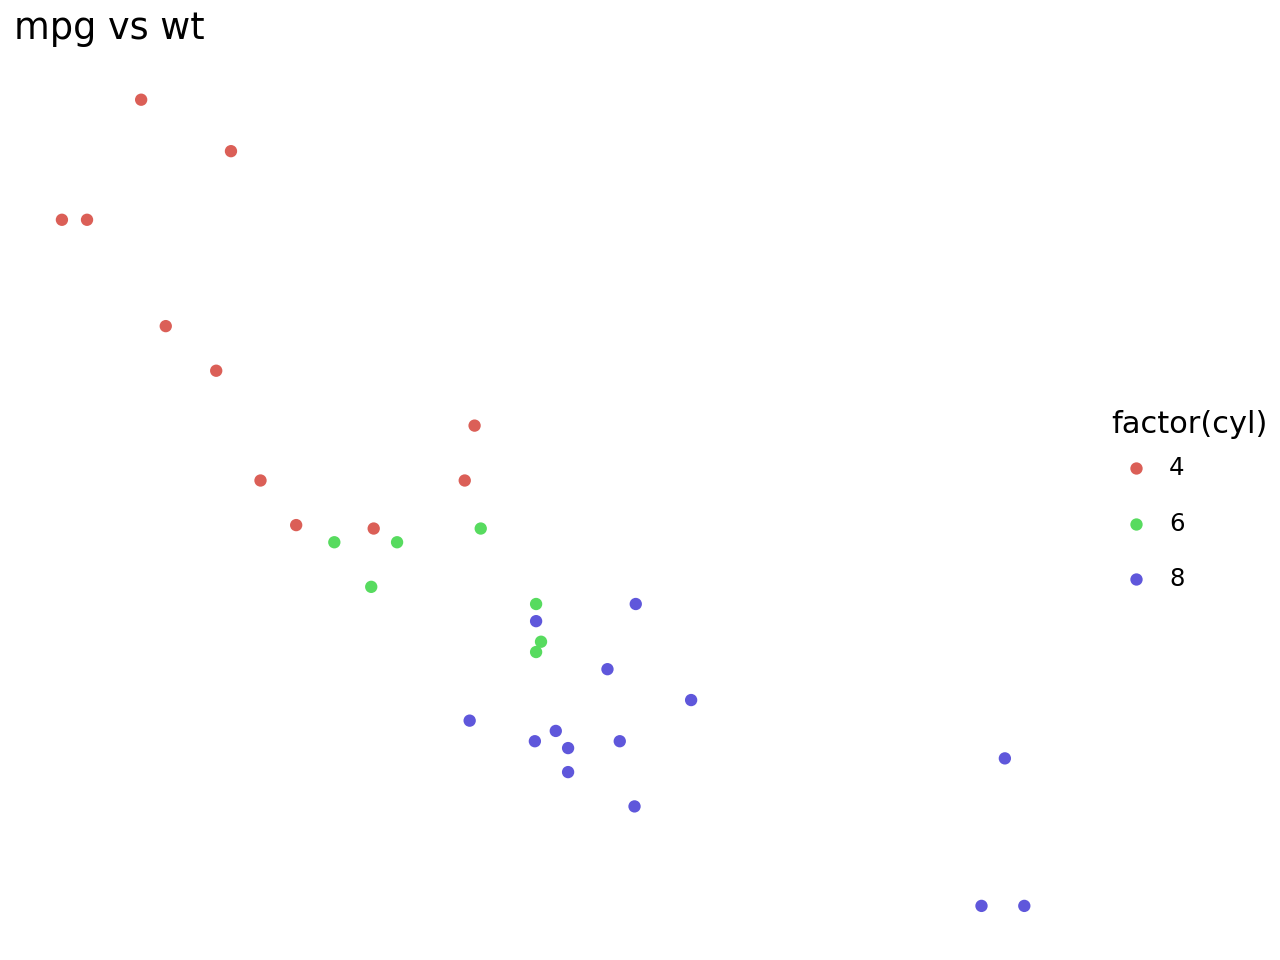

In [4]:
p1

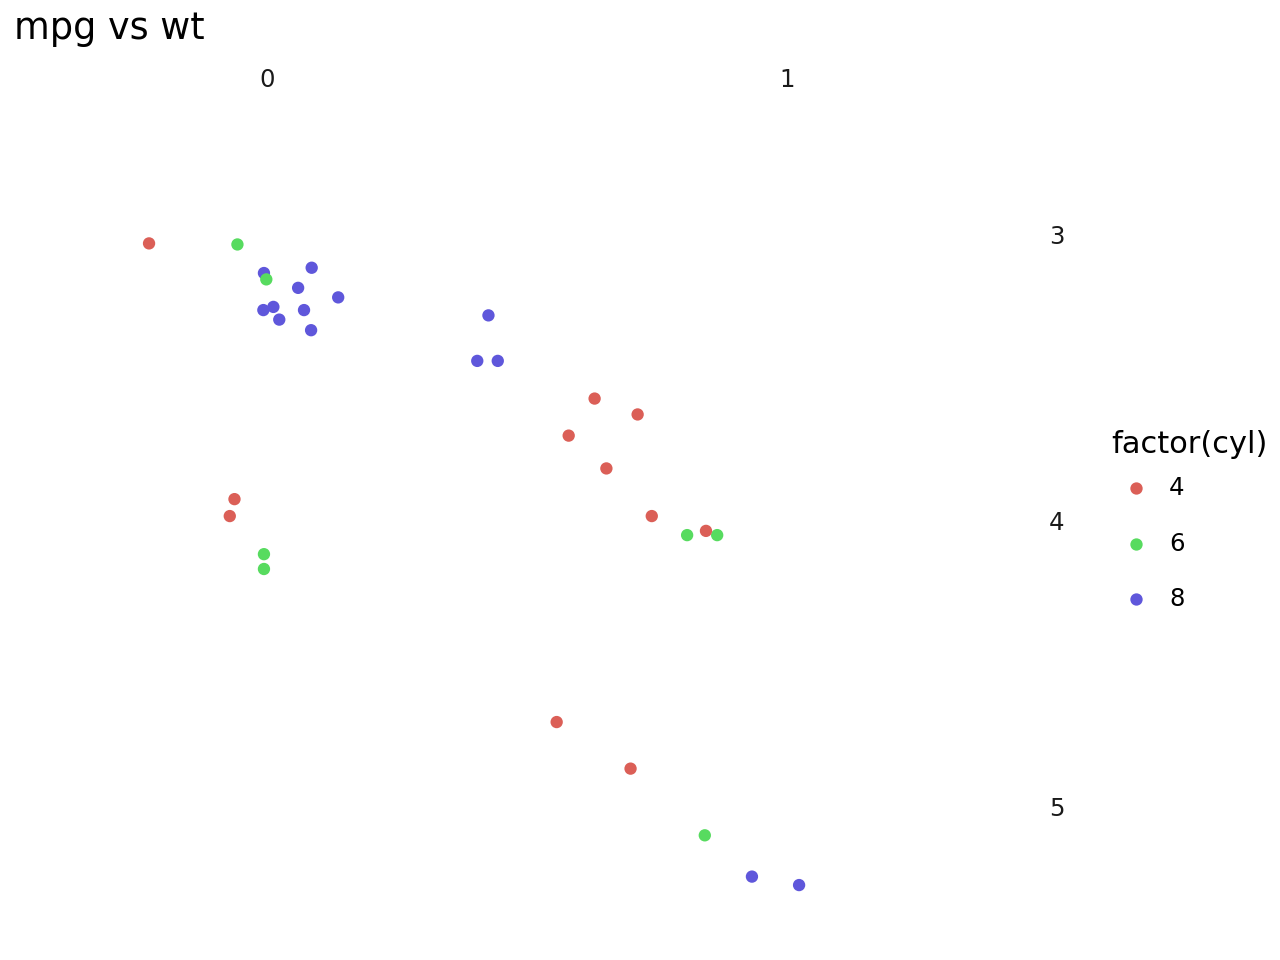

In [5]:
p2

There are 3 main top level theming elements:

1.  `text` - controls all the text elements in the figure.
2.  `rect` - controls all the rectangles in the figure.
3.  `line` - controls all the lines in the figure.

Note that none of the `themeables` control/modify the plotted data. e.g
You cannot use `text` to change the appearance of objects plotted with
`geom_text`.

**text**

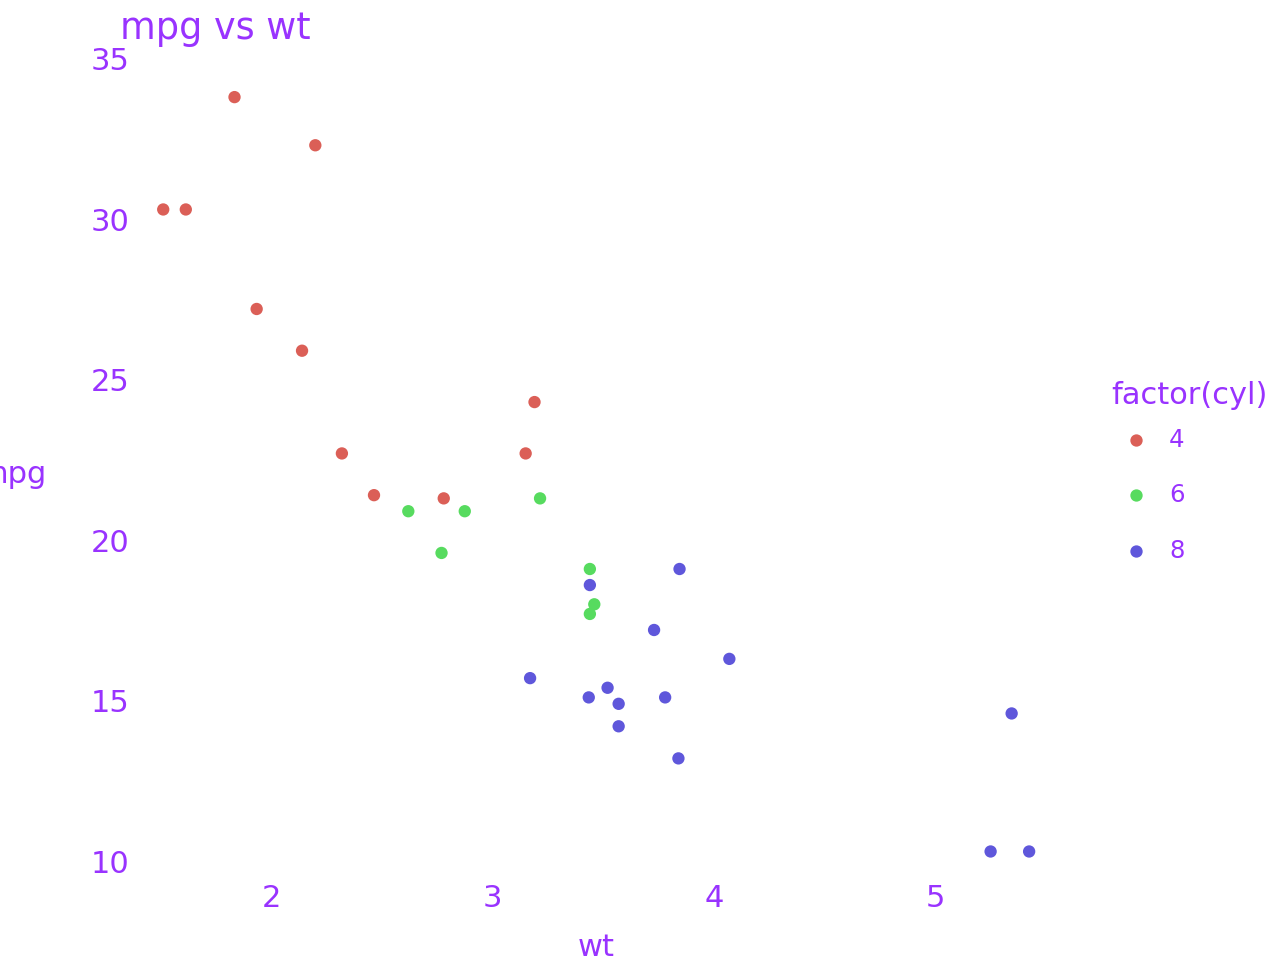

In [6]:
p1 + theme(
    text=element_text(color=purple)
)

**rect**

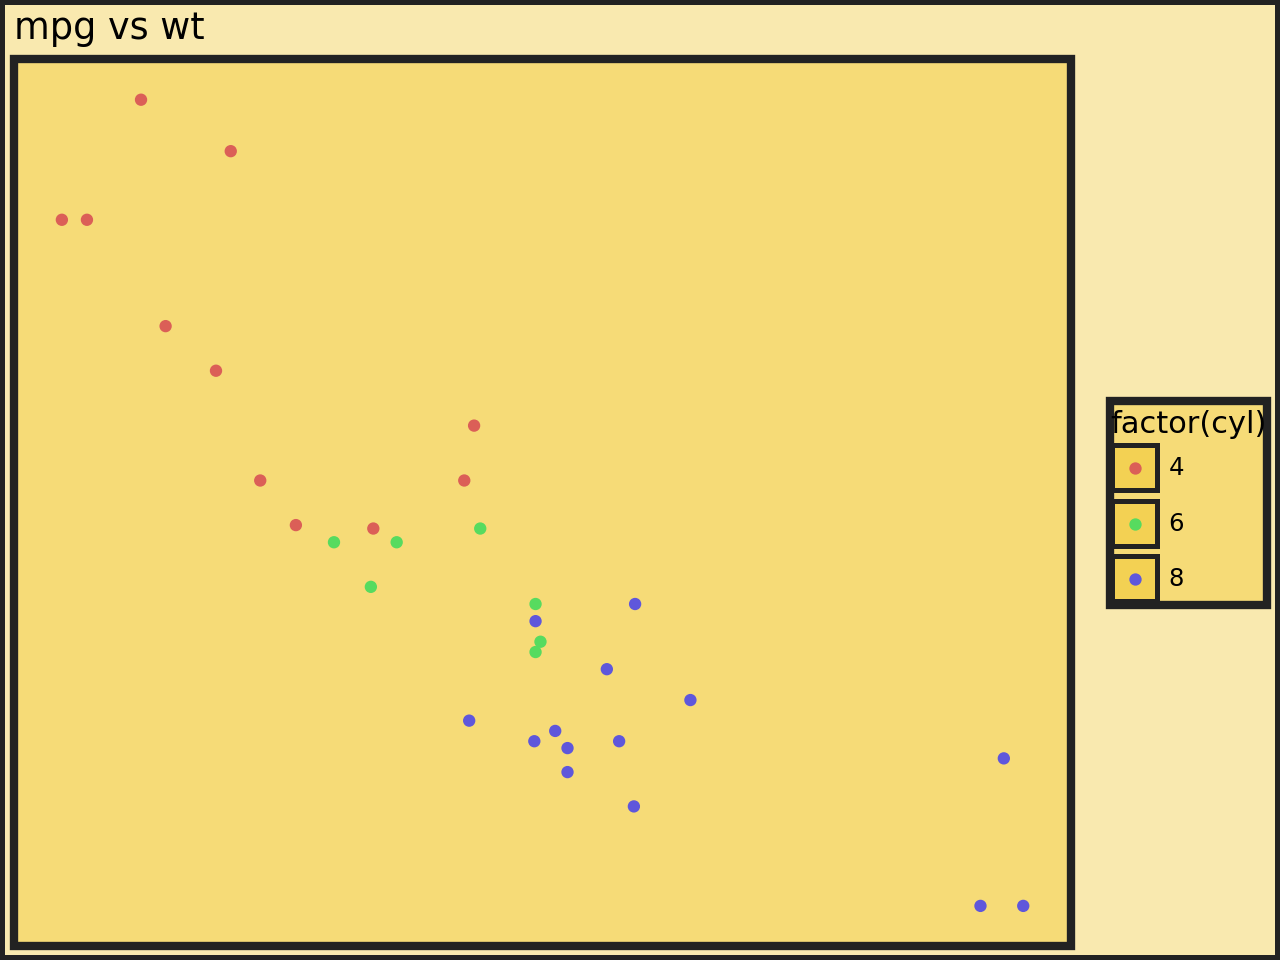

In [7]:
p1 + theme(
    rect=element_rect(color=black, size=3, fill='#EEBB0050')
) 

**line**

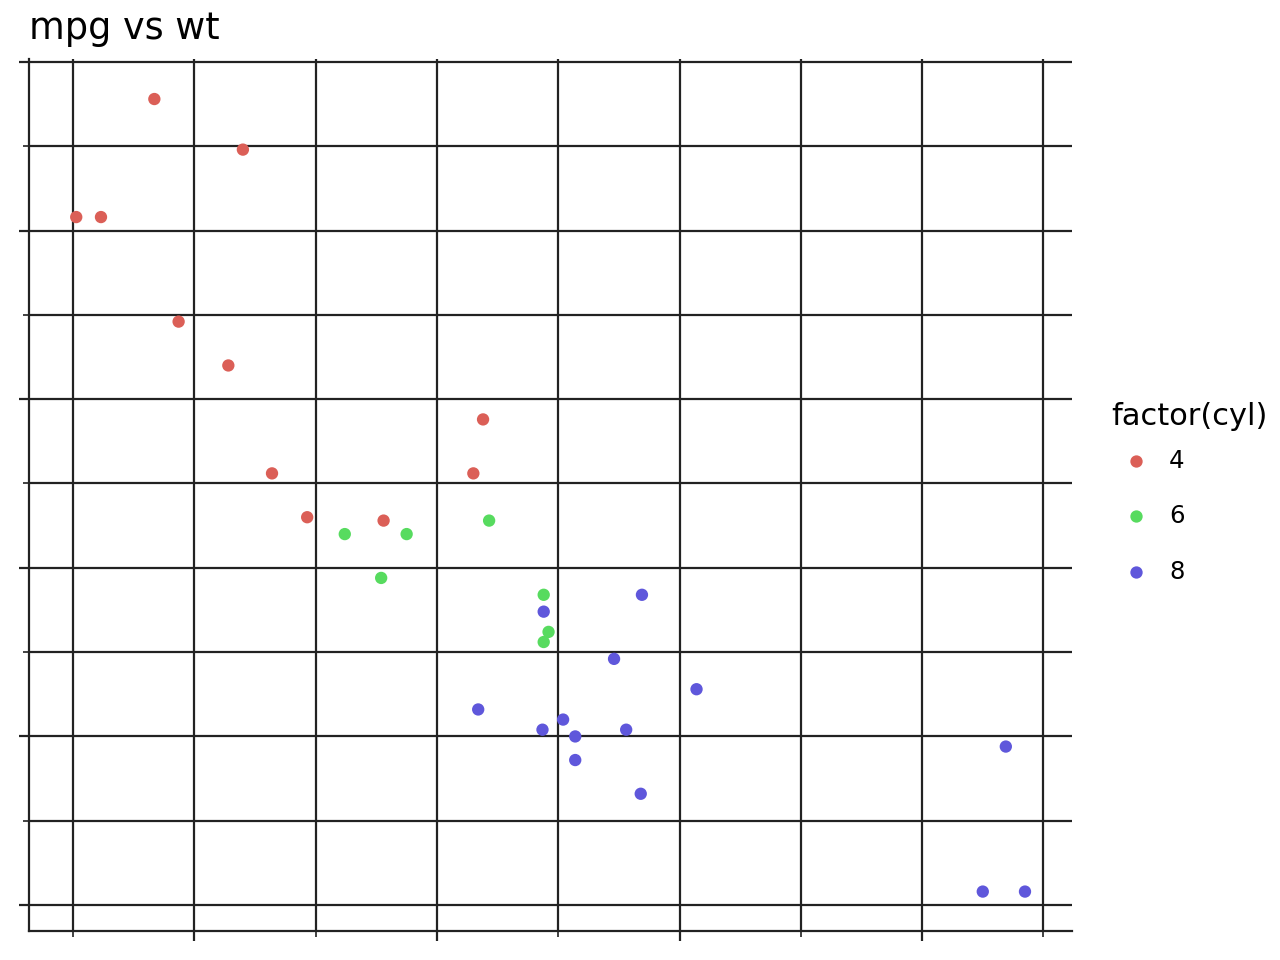

In [8]:
p1 + theme(
    line=element_line(color=black)
)

## Theming specific items

### axis_line and axis_text

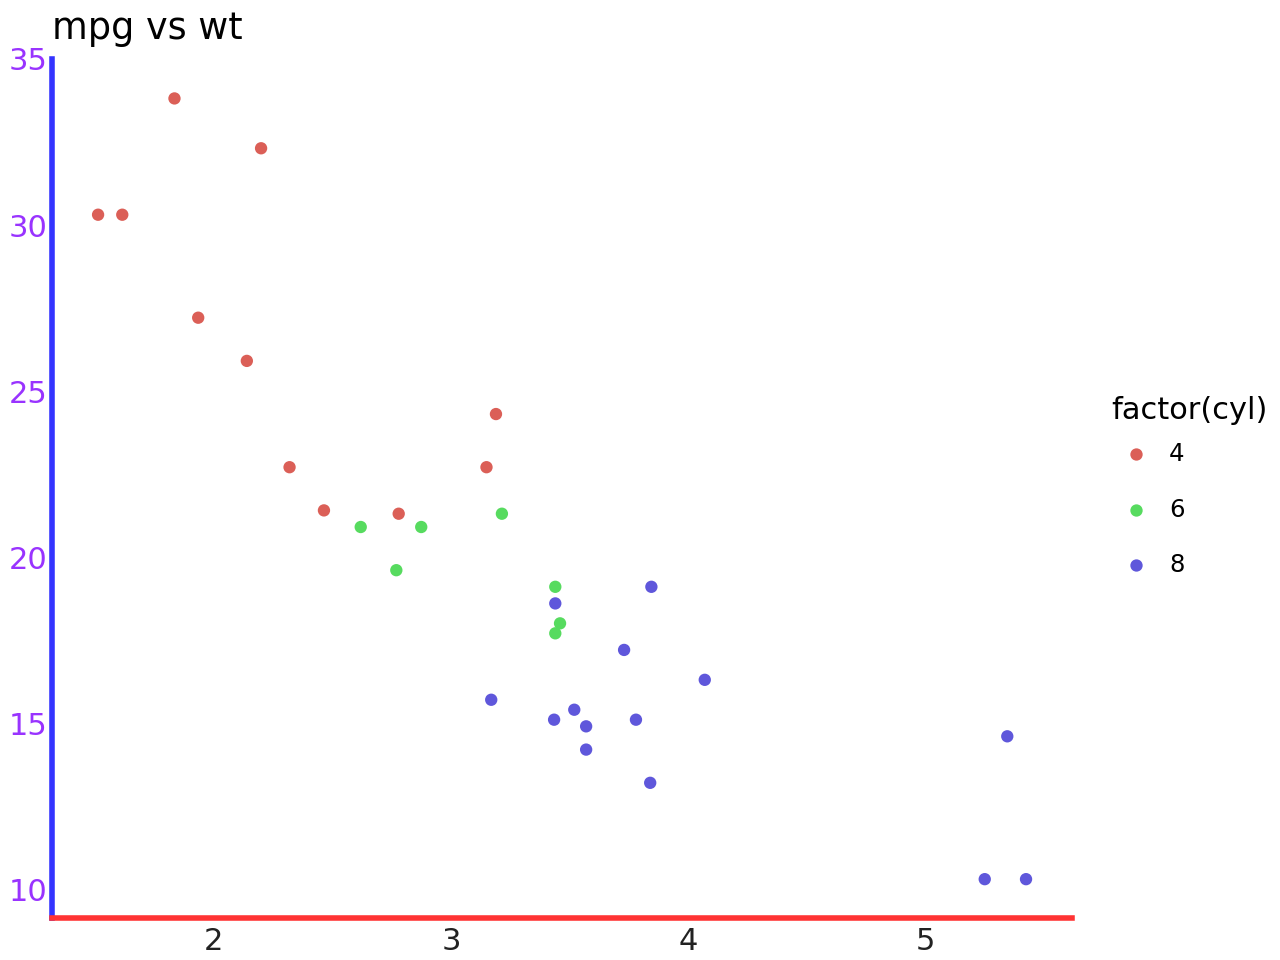

In [9]:
p1 + theme(
    axis_line=element_line(size=2),
    axis_line_x=element_line(color=red),
    axis_line_y=element_line(color=blue),
    
    axis_text=element_text(margin={'t': 5, 'r': 5}),
    axis_text_x=element_text(color=black),
    axis_text_y=element_text(color=purple)
)

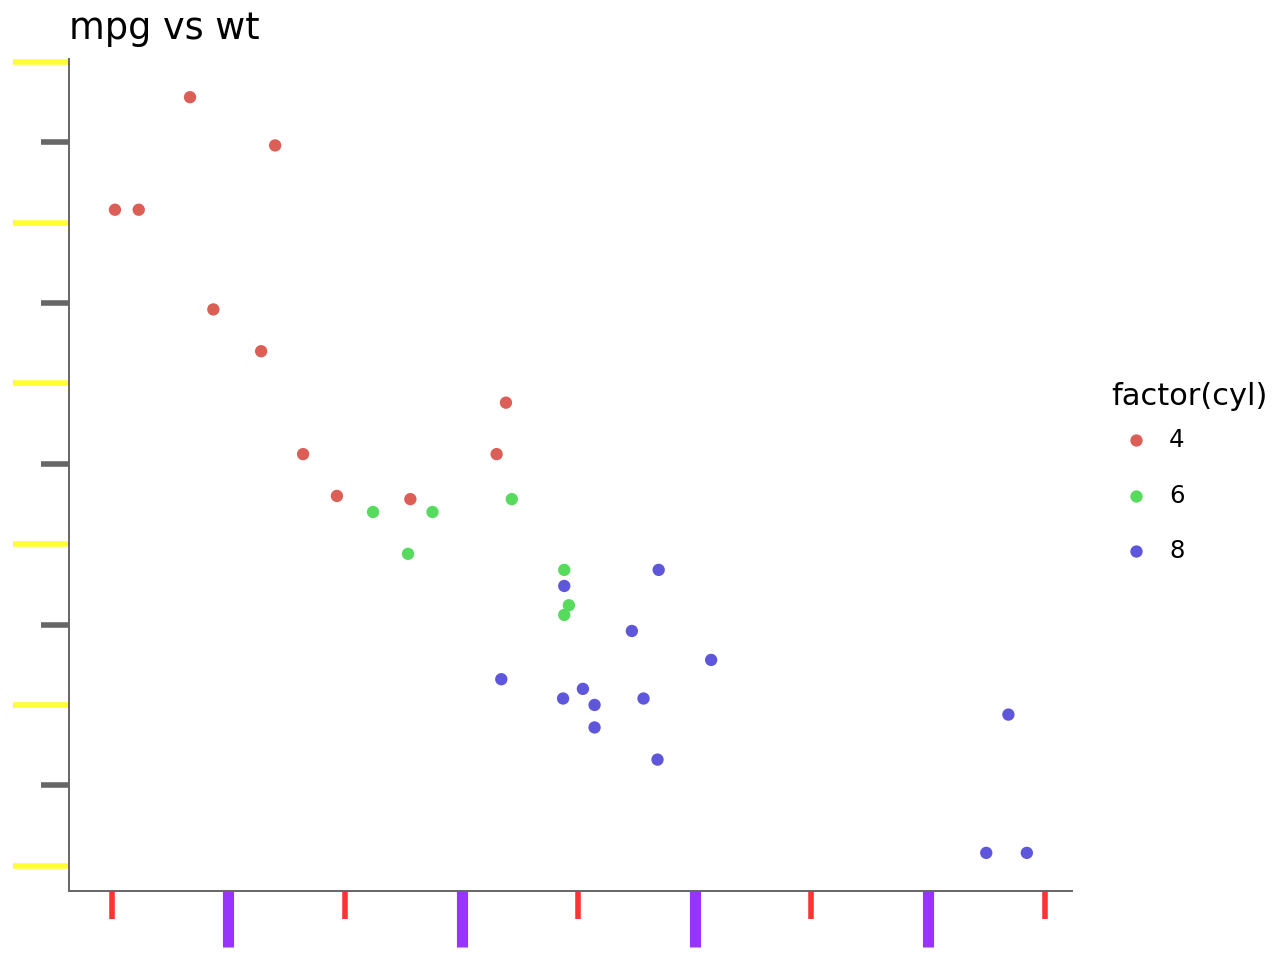

In [10]:
p1 + theme(
    axis_line=element_line(size=.7, color=gray),
    
    # We are focusing on the ticks, make them long
    axis_ticks_length=20,
    axis_ticks_length_minor=10,
    axis_ticks_length_major=20,
    
    axis_ticks=element_line(size=2),
    
    axis_ticks_major=element_line(color=purple),
    axis_ticks_major_x=element_line(size=4),        # override size=2
    axis_ticks_major_y=element_line(color=yellow),  # override color=purple
    
    axis_ticks_minor=element_line(color=red),
    axis_ticks_minor_x=element_line(),              # do not override anything
    axis_ticks_minor_y=element_line(color=gray),    # override color=red

)

### axis_title and axis_ticks_pad

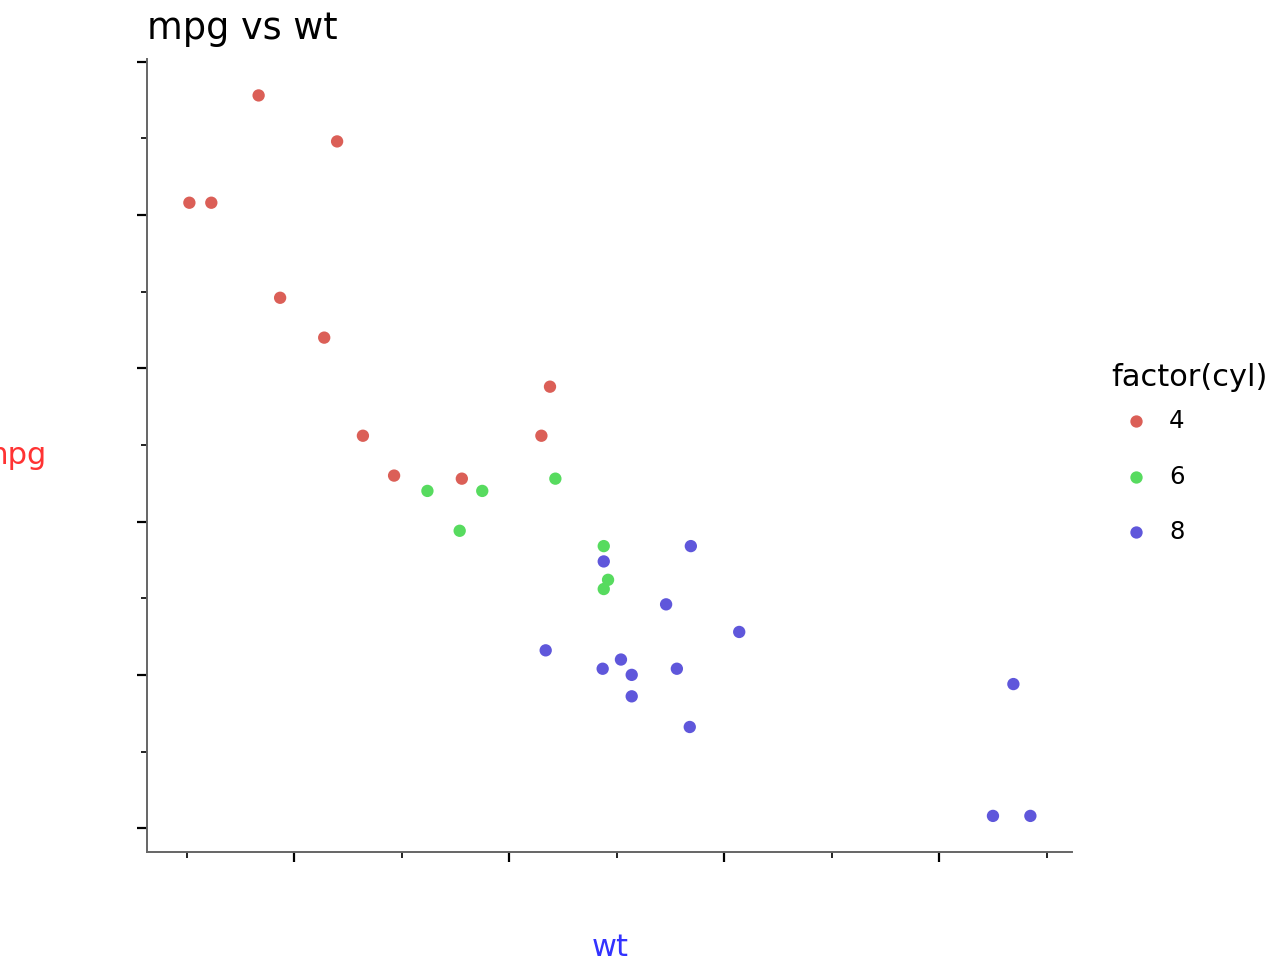

In [11]:
p1 + theme(
    axis_line=element_line(size=.7, color=gray),
    axis_ticks=element_line(),
    
    axis_title=element_text(),
    axis_title_x=element_text(color=blue),
    axis_title_y=element_text(color=red),
    
    # The gap between the title and the ticks
    axis_ticks_pad=20,
    axis_ticks_pad_major=20,
    axis_ticks_pad_minor=20
)

### axis_ticks_direction

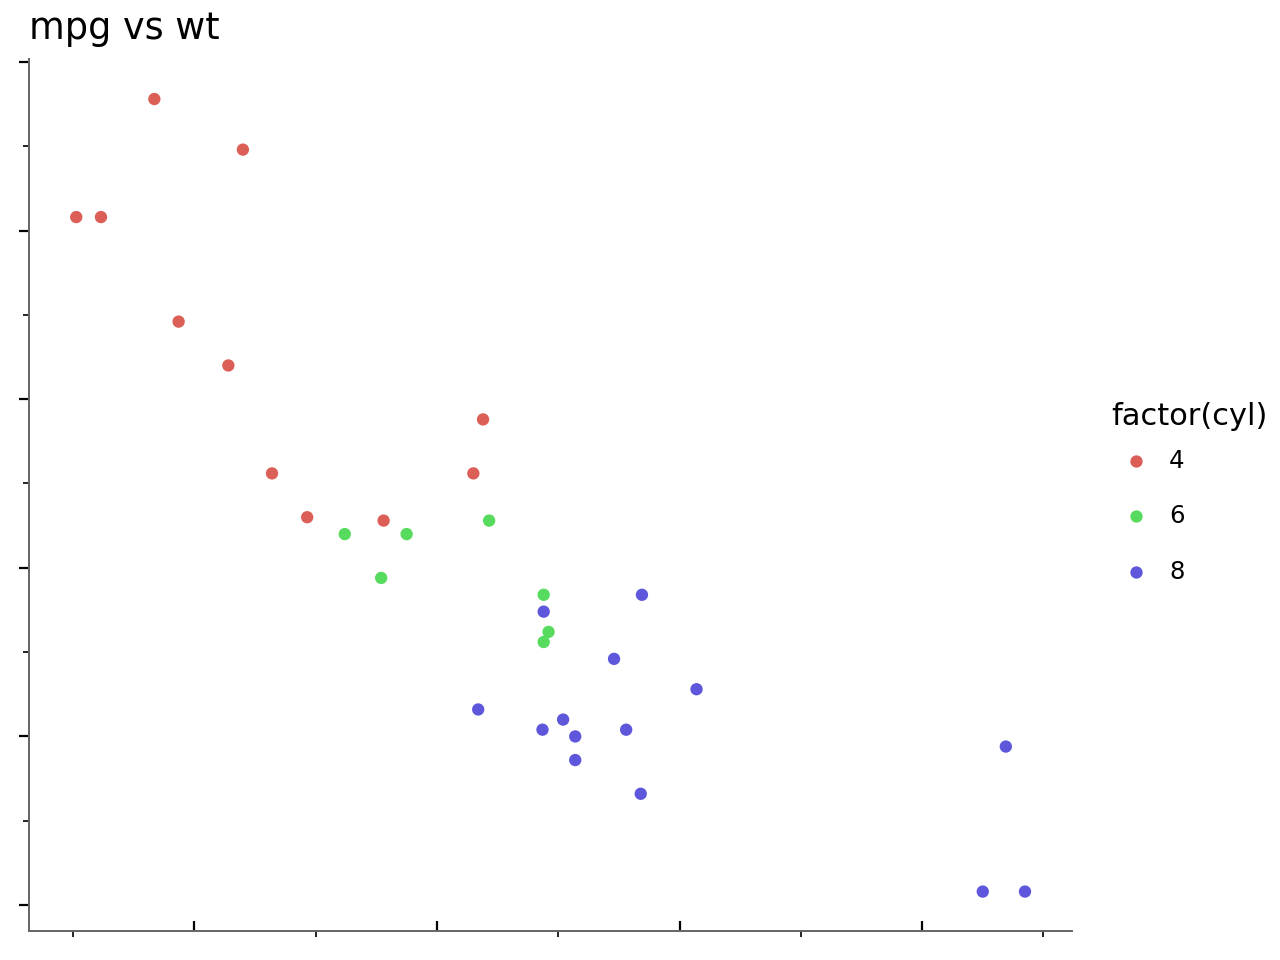

In [12]:
p1 + theme(
    axis_line=element_line(size=.7, color=gray),
    axis_ticks=element_line(),
    
    axis_ticks_direction='in',
    axis_ticks_direction_x='in',
    axis_ticks_direction_y='out'
)

### Legend_box

Not all themeables that affect the legend box are demonstrated

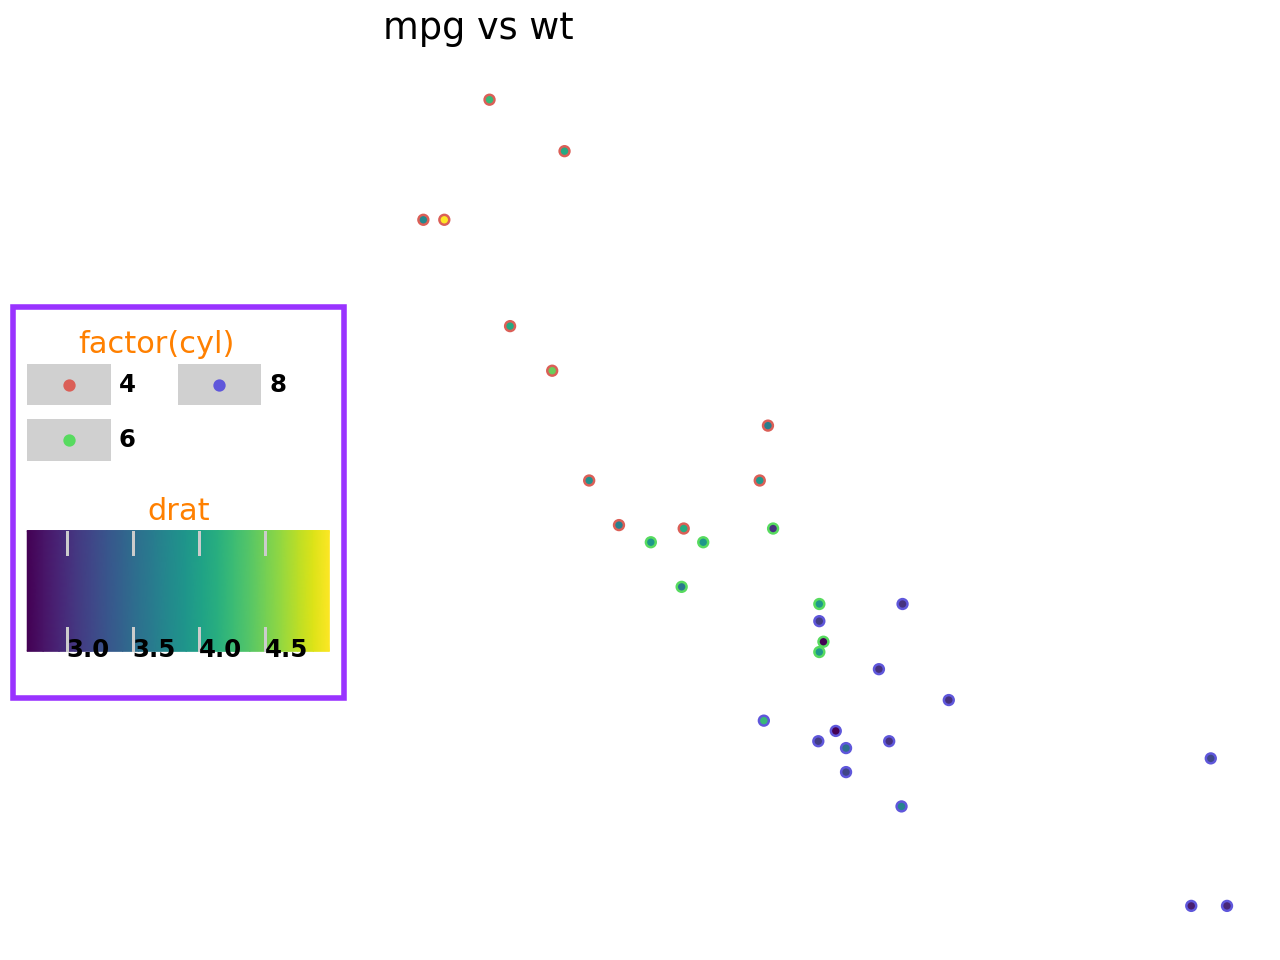

In [13]:
(p1 + aes(fill='drat')
 + theme(
    legend_position='left',
    legend_direction='horizontal', # affected by the ncol=2
    legend_title_align='center',
    legend_box_margin=5,
    legend_background=element_rect(color=purple, size=2, fill='white'),
     
    legend_box='vertical',
     
    legend_key=element_rect(fill=gray, alpha=.3),
    legend_title=element_text(color=orange),
    legend_text=element_text(weight='bold'),
    
    legend_key_size=30,            # overridden
    legend_key_width=30,
    legend_key_height=15,

    legend_entry_spacing=10,      # overridden
    legend_entry_spacing_x=15,
    legend_entry_spacing_y=5) 
 
 # so we can see legend_entry_spacing in action
 + guides(color=guide_legend(ncol=2))
)

### plot_background, panel_background and panel_border

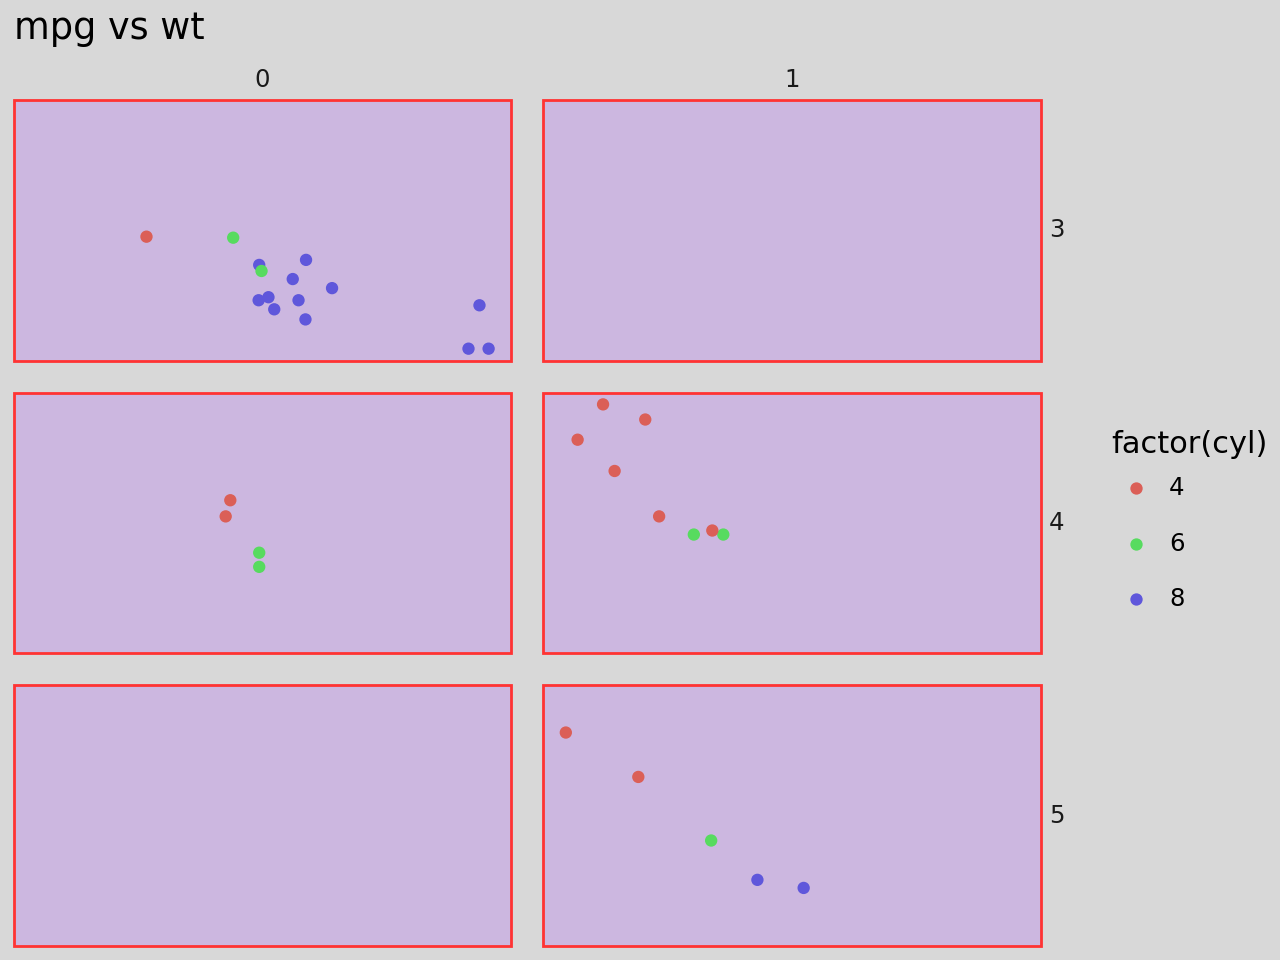

In [14]:
p2 + theme(
    plot_background=element_rect(fill='gray', alpha=.3),
    panel_background=element_rect(fill=purple, alpha=.2),
    panel_border=element_rect(color=red, size=1),
    panel_spacing=.025,
    #panel_spacing_x=.005,
    #panel_spacing_y=.025
)

### panel_grid

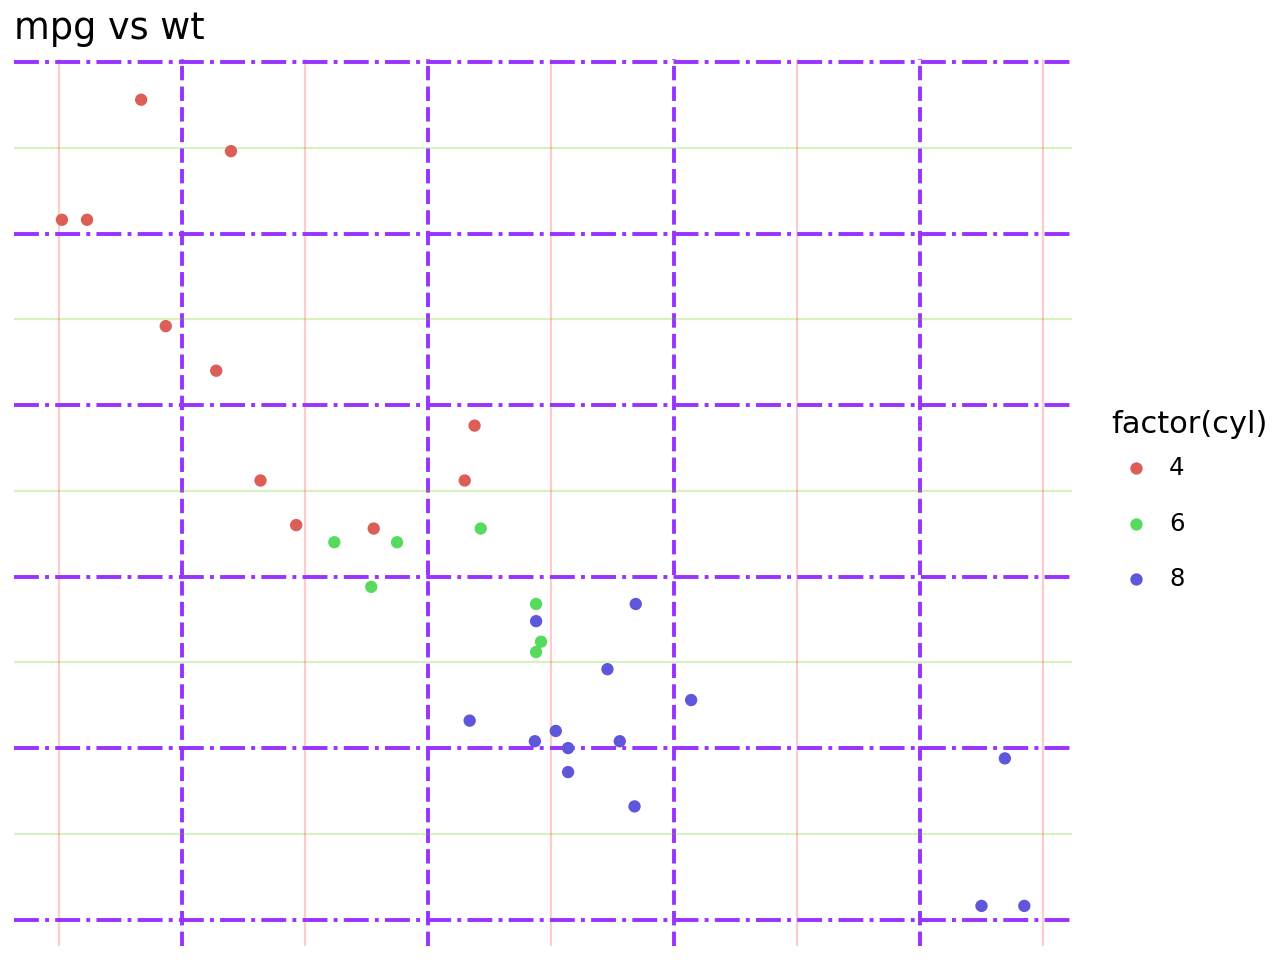

In [15]:
p1 + theme(
    panel_grid=element_line(color=purple),
    
    panel_grid_major=element_line(size=1.4, alpha=1),
    panel_grid_major_x=element_line(linetype='dashed'),
    panel_grid_major_y=element_line(linetype='dashdot'),
    
    panel_grid_minor=element_line(alpha=.25),
    panel_grid_minor_x=element_line(color=red),
    panel_grid_minor_y=element_line(color=green),
    
    panel_ontop=False  # puts the points behind the grid
 )

### strip_background, strip_align and strip_text

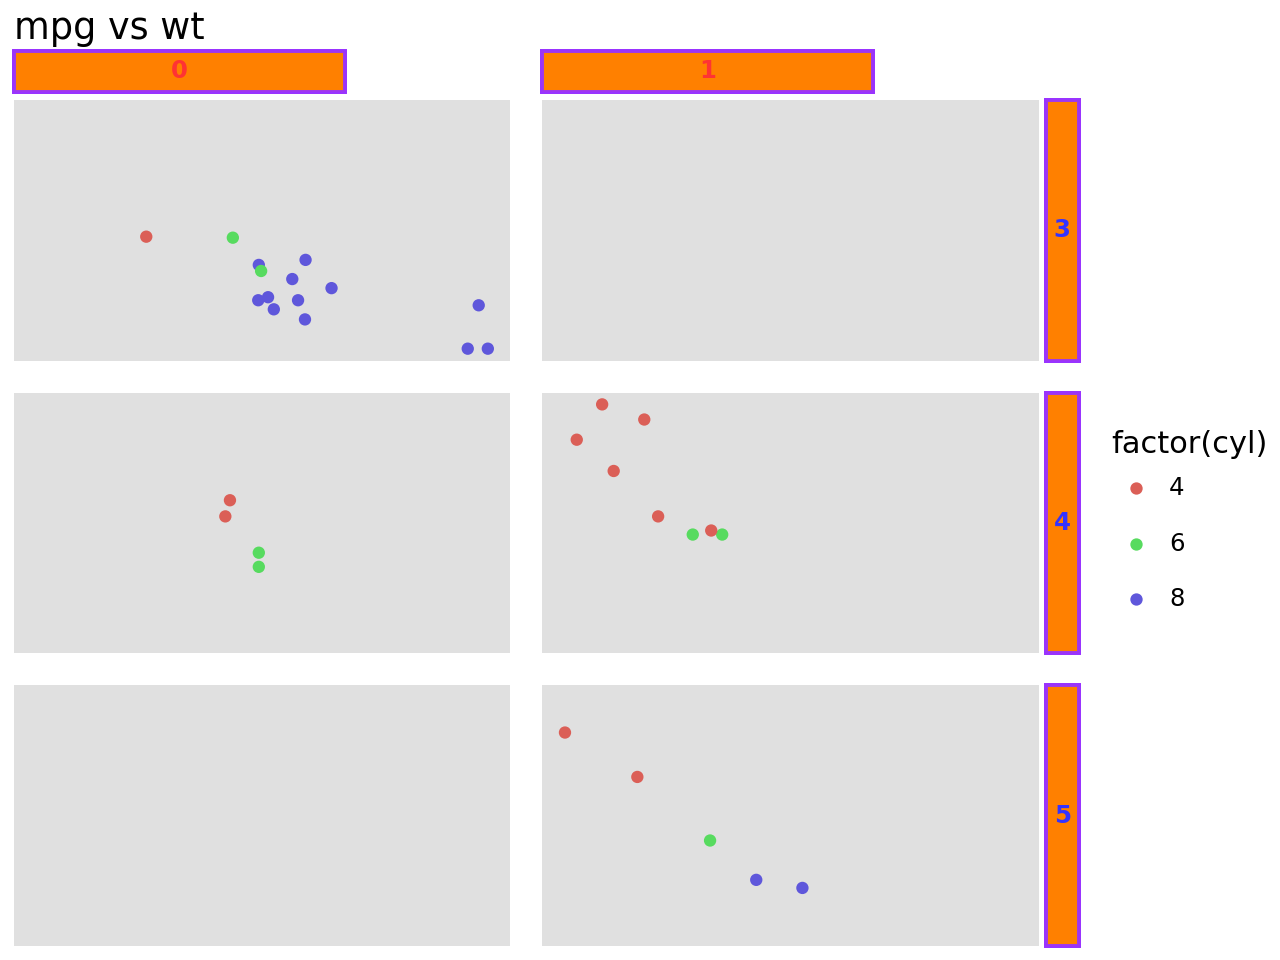

In [16]:
p2 + theme(
    panel_spacing=.025,
    panel_background=element_rect(fill=gray, alpha=.2),
    
    strip_background=element_rect(color=purple, fill=orange, size=1.4, alpha=.95),
    strip_background_x=element_rect(x=1/6, width=2/3), # you can get really crazy
    strip_background_y=element_rect(),
    
    strip_align=0,
    strip_align_x=0.2,
    strip_align_y=0.2,
    
    strip_text=element_text(weight='bold'),
    strip_text_x=element_text(color=red),
    strip_text_y=element_text(color=blue)
 )

### aspect_ratio and figure_size

The `aspect_ratio` takes precedence over the `figure_size`, and it
modifies the height. The effective width and height are:

``` python
width = figure_size[0]
height = figure_size[0] * aspect_ratio
```

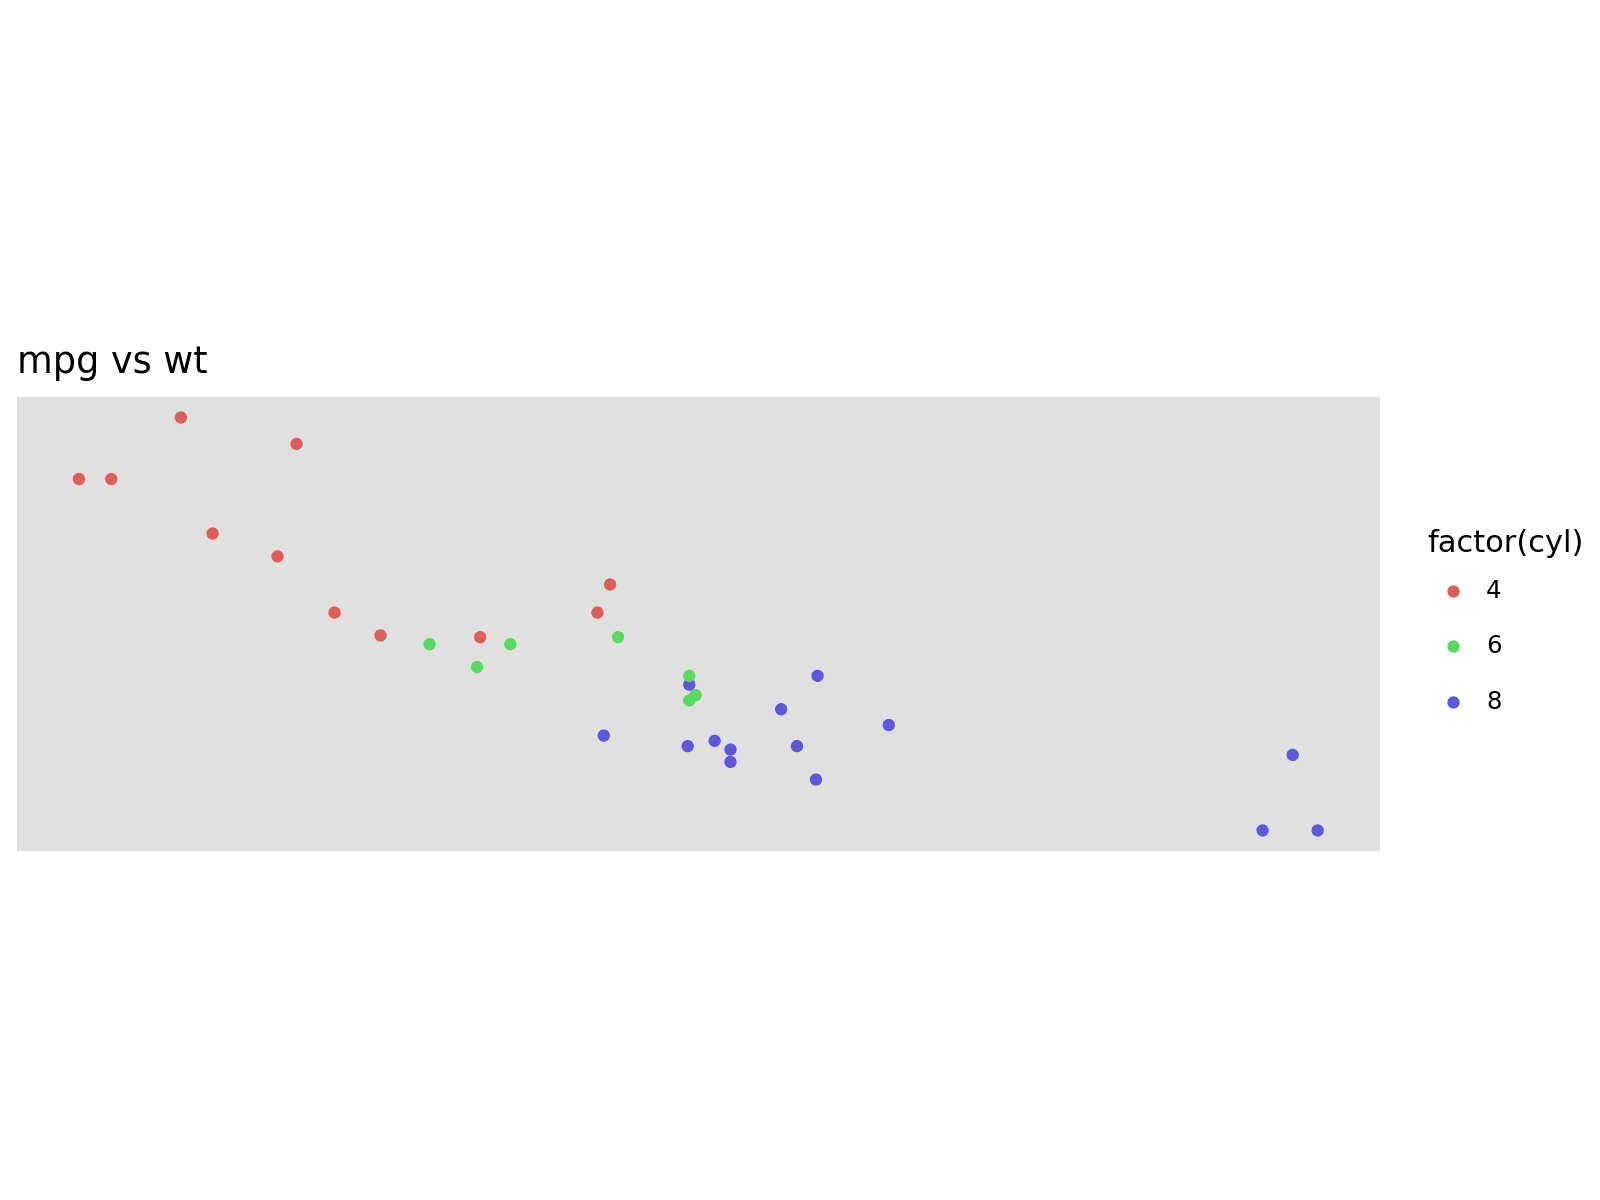

In [17]:
p1 + theme(
    panel_background=element_rect(fill=gray, alpha=.2),
    #dpi=120,
    figure_size=(8, 6), # inches
    aspect_ratio=1/3    # height:width
)